In [20]:
import numpy as np
from scipy.stats import multivariate_normal

Xmat = np.genfromtxt('clusterdata.csv', delimiter=',')
K = 3
n, D = Xmat.shape
W = np.array([[1/3,1/3,1/3]])
M= np.array([[-2.0,-4,0],[-3,1,-1]], dtype=np.float32)
# Note that if above *all* entries were written as integers , M would
# be defined to be of integer type, which will give the wrong answer
C = np.zeros((3,2,2))
C[:,0,0] = 1
C[:,1,1] = 1
p = np.zeros((3,300))
for i in range(0,100):
#E-step
    for k in range(0,K):
        mvn = multivariate_normal( M[:,k].T, C[k,:,:] )
        p[k,:] = W[0,k]*mvn.pdf(Xmat)
# M-Step
    p = (p/sum(p,0))
    #normalize
    W = np.mean(p,1).reshape(1,3)
    for k in range(0,K):
        M[:,k] = (Xmat.T @ p[k,:].T)/sum(p[k,:])
        xm = Xmat.T - M[:,k].reshape(2,1)
        C[k,:,:] = xm @ (xm*p[k,:]).T/sum(p[k,:])
        

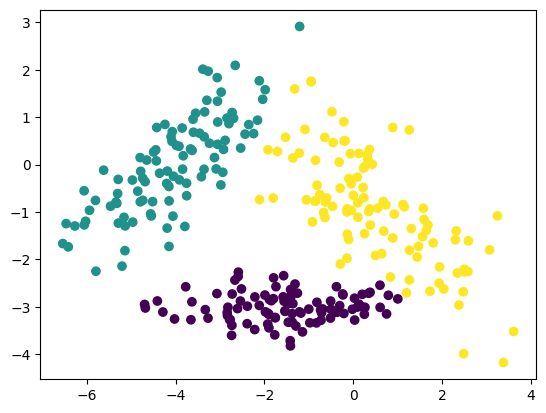

In [21]:
import matplotlib.pyplot as plt

# クラスターの結果を描画する
plt.scatter(Xmat[:,0], Xmat[:,1], c=np.argmax(p, axis=0)+2)
plt.scatter(M[0,:], M[1,:], c='red', marker='')
plt.savefig('em_clust.pdf')
plt.show()